# Exploratory Data Analysis & Data Cleaning
- An important step in a data science process.
- EDA informs us about the data and may give interesting insights.
- We need to clean our data so that it will not negatively affects our analysis.

In [1]:
help("pandas")

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

In [3]:
import pandas as pd
%matplotlib inline

In [4]:
data = pd.ExcelFile('data/population_literacy.xlsx')
df = data.parse('Sheet1')
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,1.324655e+09
1,Inde,ASI,50.8,2.682,1.139965e+09
2,USA,NAM,99.0,2.077,3.040600e+08
3,Indonésie,ASI,88.8,2.132,2.273451e+08
4,Brésil,LAT,90.2,1.827,NaN


- Unclean data
- Column names are inconsistent - first letter capitalisation
- Missing data - NaN
- Country names stored in French

In [5]:
print(data.sheet_names)

['Sheet1']


In [6]:
#Inspect the column for any anomalies
df.columns

Index(['Country ', 'Continent  ', 'female literacy', 'fertility',
       'population'],
      dtype='object')

- We can see that the title of the column are not tidy. Some has blank space after the naming and some do not even have proper or standard capitalisation. Hence, we rename the column names.

In [7]:
#Rename the column names by using the rename method on the data frame. 
df.rename(columns={'Country ': 'Country', 'Continent  ': 'Continent', 'female literacy': 'Female Literacy',
                    'fertility': 'Fertility', 'population': 'Population'}, inplace=True)

In [8]:
#Check the columns again
df.columns

Index(['Country', 'Continent', 'Female Literacy', 'Fertility', 'Population'], dtype='object')

In [9]:
#Check the shape of the data by using the shape attribute
df.shape

(163, 5)

- We can use info() method to get brief information on each column. 
- Notice that the Population column has 148 non-null entries while others had 163.
- This may signals missing data.

In [11]:
#Inspect the summary of the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
Country            163 non-null object
Continent          163 non-null object
Female Literacy    163 non-null float64
Fertility          163 non-null float64
Population         148 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


- From here, we can observed that on the 'Population' variable has missing data.

In [12]:
#Check which column has missing data
df.isna().any()

Country            False
Continent          False
Female Literacy    False
Fertility          False
Population          True
dtype: bool

- Column 'Population' has missing data

In [13]:
#Check which rows have missing data
df.isna().any(axis=1)

0      False
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16      True
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145     True
146    False
147    False
148     True
149     True
150     True
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160     True
161    False
162    False
Length: 163, dtype: bool

In [14]:
#View rows containing missing data
df.loc[df.isna().any(axis=1)]

,Country,Continent,Female Literacy,Fertility,Population
4,Brésil,LAT,90.2,1.827,NaN
16,Turquie,ASI,81.3,2.100,NaN
17,"Iran, République islamique d'",ASI,77.2,1.781,NaN
19,Rép. Démocratique du Congo,AF,56.1,5.908,NaN
27,Espagne,EUR,96.9,1.468,NaN
49,Mozambique,AF,40.1,4.967,NaN
51,Côte d'Ivoire,AF,44.3,4.514,NaN
86,Burundi,AF,59.9,4.450,NaN
94,Togo,AF,53.7,4.166,NaN
100,Nicaragua,LAT,77.9,2.683,NaN


- 15 observations contains NaN on population variable

In [15]:
#View the specific missing data entry
df.loc[df.isna().any(axis=1), df.isna().any()]

,Population
4,NaN
16,NaN
17,NaN
19,NaN
27,NaN
49,NaN
51,NaN
86,NaN
94,NaN
100,NaN


In [16]:
#Perform values count on the Population column to confirm if there are missing data. Set drna=False
df['Population'].value_counts(dropna=False).head()

NaN           15
5493621.0      2
1167834.0      1
46258200.0     1
31656865.0     1
Name: Population, dtype: int64

In [17]:
#Check if the Country column contains duplicate country names
df['Country'].value_counts(dropna=False).head()

Denmark        2
Afghanistan    1
Tadjikistan    1
Tunisie        1
Ghana          1
Name: Country, dtype: int64

- **It seems that Denmark has duplicated data. Hence, we need to delete one?**
- **We can also calculate summary statistics on the dataset to gain further insights.**

- We can also calculate summary statistics on the dataset to gain further insights.
- Use the describe() method to view the summary statistics on each column.
- The statistics include count, min, max, standard deviation and quartile values.

In [20]:
df.describe()

,Female Literacy,Fertility,Population
count,163.000000,163.000000,1.480000e+02
mean,80.223313,2.872356,6.360217e+07
std,23.028749,1.425467,3.079884e+08
min,12.600000,0.966000,1.035660e+05
25%,66.550000,1.824500,3.574732e+06
50%,90.200000,2.362000,9.776874e+06
75%,98.500000,3.877500,2.881632e+07
max,100.000000,7.069000,3.336134e+09


- Observe that there is a country with max population of 3bil. FYI, there is no country in the world today that has a population of 3bil.

***

## Visual EDA
- Use EDA analysis to aid us to view the data better. Import matplotlib packages

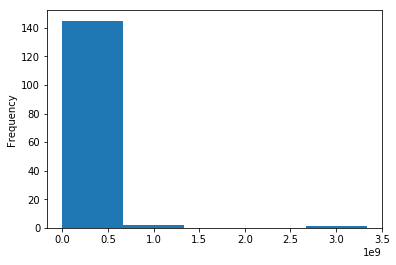

In [21]:
import matplotlib.pyplot as plt

#Histogram
df.Population.plot('hist', bins=5)

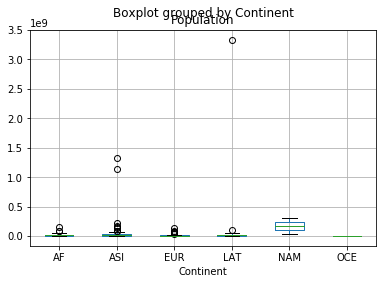

In [22]:
#Boxplot

df.boxplot(column='Population', by='Continent')

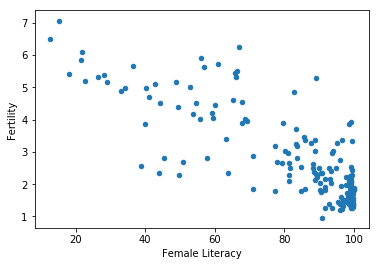

In [24]:
#Scatterplot

df.plot.scatter(x='Female Literacy', y='Fertility')

***

# Data Cleaning

In [25]:
#Create a data frame containing sample data

tidy_data = pd.DataFrame(data={'name': ['Daniel', 'John', 'Jane'], 'treatment a': [10, 12, 24], 
                               'treatment b': [42, 31, 27]})

print(tidy_data)

     name  treatment a  treatment b
0  Daniel           10           42
1    John           12           31
2    Jane           24           27


- Melt() will reshaped the data structure from wide to long.


In [26]:
tidy_data_melt = pd.melt(frame=tidy_data, id_vars='name', value_vars=['treatment a', 'treatment b'],
                        var_name='treatment', value_name='reading')

tidy_data_melt

,name,treatment,reading
0,Daniel,treatment a,10
1,John,treatment a,12
2,Jane,treatment a,24
3,Daniel,treatment b,42
4,John,treatment b,31
5,Jane,treatment b,27


In [27]:
#To reverse the effect of melt(), use pivot()
tidy_data = tidy_data_melt.pivot(index='name', columns='treatment', values='reading')

tidy_data

treatment,treatment a,treatment b
name,,
Daniel,10,42
Jane,24,27
John,12,31


In [28]:
#Append duplicate data to tidy_data_melt (add row to data frame)
tidy_data_melt = tidy_data_melt.append(pd.DataFrame(data={'name': ['Jane'], 'treatment': ['treatment a'],
                                                         'reading': [16]}))

In [29]:
import numpy as np

#View duplicated data
tidy_data_melt

,name,treatment,reading
0,Daniel,treatment a,10
1,John,treatment a,12
2,Jane,treatment a,24
3,Daniel,treatment b,42
4,John,treatment b,31
5,Jane,treatment b,27
0,Jane,treatment a,16


In [30]:
tidy_data_melt.pivot_table(index='name', columns='treatment', values='reading', aggfunc=np.mean)

treatment,treatment a,treatment b
name,,
Daniel,10,42
Jane,20,27
John,12,31


- **We can see that for Jane, treatment a, 20 = average of 24 and 16.**

***

## Sampling Data
- Pandas has a sample() method for us to perform random sampling of items from your data frame.

In [31]:
# Create a data frame containing 2 columns of 20 random integers ranging from 0 to 9.

artificial_data = pd.DataFrame(np.random.randint(0,10,size=(20,2)), columns=list('AB'))

print(artificial_data)

    A  B
0   8  0
1   9  8
2   2  9
3   0  9
4   7  1
5   9  5
6   8  6
7   2  7
8   9  7
9   9  4
10  2  5
11  4  9
12  1  7
13  9  0
14  8  3
15  4  8
16  2  9
17  9  6
18  0  9
19  3  1


In [32]:
#sample using frac

artificial_data.sample(frac=0.3)

,A,B
14,8,3
9,9,4
17,9,6
7,2,7
3,0,9
5,9,5


In [33]:
# sample using n

artificial_data.sample(n=4)

,A,B
18,0,9
15,4,8
10,2,5
2,2,9


***

## Removing erratic entries

- It is common to have strings in numeric columns (especially date)
- For example, a dash (-) is a typical entry for empty rows/columns
- These dashed are considered unclean data as they negatively affect the analysis process
- The 'coerce' argument in Pandas to numeric() method will force these erratic entries to be NaN.

In [34]:
# Create a data frame containing sample data

erratic_data = pd.DataFrame(data={'name': ['Daniel', 'John', 'Jane'], 'treatment a': ['-', 12, 24], 
                               'treatment b': [42, 31, 27]})
                                               
erratic_data                            

,name,treatment a,treatment b
0,Daniel,-,42
1,John,12,31
2,Jane,24,27


In [35]:
# Convert 'treatment a' column to numeric and force non-numeric entries to NaN

erratic_data['treatment a'] = pd.to_numeric(erratic_data['treatment a'], errors='coerce')

erratic_data

,name,treatment a,treatment b
0,Daniel,NaN,42
1,John,12.0,31
2,Jane,24.0,27


***

## Dropping Duplicates

In [36]:
# Apppend duplicate data to tidy_data_melt (add row to data frame)

erratic_data = erratic_data.append(pd.DataFrame(data={'name': ['Jane'], 'treatment a': [24.0], 'treatment b': [27]}))

erratic_data

,name,treatment a,treatment b
0,Daniel,NaN,42
1,John,12.0,31
2,Jane,24.0,27
0,Jane,24.0,27


In [37]:
# Check for duplicates using the duplicated method

erratic_data.duplicated()


0    False
1    False
2    False
0     True
dtype: bool

In [38]:
# Remove duplicate using drop_duplicates()

erratic_data.drop_duplicates()

,name,treatment a,treatment b
0,Daniel,NaN,42
1,John,12.0,31
2,Jane,24.0,27


***

## Missing Data

3 common approaches:
- leave as-is
- drop them
- fill missing value (using summary statistics)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
Country            163 non-null object
Continent          163 non-null object
Female Literacy    163 non-null float64
Fertility          163 non-null float64
Population         148 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


In [40]:
# Dropping all the rows that contain missing values
df_dropna = df.dropna()
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 162
Data columns (total 5 columns):
Country            148 non-null object
Continent          148 non-null object
Female Literacy    148 non-null float64
Fertility          148 non-null float64
Population         148 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.9+ KB


- Besides dropping all the rows together, you can opt to fill the missing data with statistical values
- Firstly, display all the rows containing missing data using isnull() and any() methods.
- Then, use the fillna() method to fill them with median values

In [41]:
# Setting axis=1 ensures that the code checks on per row basis

df[df.isnull().any(axis=1)]
# Show all the rows that contain missing values

,Country,Continent,Female Literacy,Fertility,Population
4,Brésil,LAT,90.2,1.827,NaN
16,Turquie,ASI,81.3,2.100,NaN
17,"Iran, République islamique d'",ASI,77.2,1.781,NaN
19,Rép. Démocratique du Congo,AF,56.1,5.908,NaN
27,Espagne,EUR,96.9,1.468,NaN
49,Mozambique,AF,40.1,4.967,NaN
51,Côte d'Ivoire,AF,44.3,4.514,NaN
86,Burundi,AF,59.9,4.450,NaN
94,Togo,AF,53.7,4.166,NaN
100,Nicaragua,LAT,77.9,2.683,NaN


In [45]:
# Use fillna() method to fill the missing data in Population column with median values

df['Population'] = df['Population'].fillna(df['Population'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
Country            163 non-null object
Continent          163 non-null object
Female Literacy    163 non-null float64
Fertility          163 non-null float64
Population         163 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


- We can see that all the columns have 163 entries.

***

## String manipulation

### Split

In [47]:
str = 'john albert susan tim gray carlos'

str_list = str.split()
print(str_list)

['john', 'albert', 'susan', 'tim', 'gray', 'carlos']


### Replace
- Replace the word 'hates' with 'loves'.

In [49]:
str1 = 'Everyone hates data science!'

str1.replace('hates', 'loves')

'Everyone loves data science!'

### Strip
- Strip off leading or trailing white spaces in the string.

In [50]:
str2 = '        Erratic white space in this sentence   '
print(str2)

        Erratic white space in this sentence   


In [52]:
str3 = str2.strip()
print(str3)

Erratic white space in this sentence


In [53]:
# We can strip str '['john', 'albert', 'susan', 'tim', 'gray', 'carlos']' too
str4 = str.strip()
print(str4)

john albert susan tim gray carlos


***

## Using Regex
- Regex or regular expression allow granular pattern matching in strings.
- It is really useful to search for a specific pattern or sequence of characters in a string for further processing.
- Python provides the 're' library for regex.
- To use regex in Python, we need to:
    - compile the pattern
    - use the compiled pattern to match values

In [54]:
import re

In [55]:
pattern = re.compile('[A-Z]{3}\d{6}') # 3 alphabets from A-Z and 6 digits

result = pattern.match('SEU150022') # my matrics number in UM :)

bool(result)

True

In [56]:
# Repeat by inserting the wrong pattern

pattern = re.compile('[A-Z]{3}\d{6}') 

result = pattern.match('SJEM1001') 

bool(result)

False